
## Request current listings by using Lending Club API;
## Organize the data in to data frame;
## Download the historical data from Lending Club website;
## Build a baseline model (binary classification), beware of not including the feature not in the current listing.


In [115]:
import requests
import json

In [2]:
header = {'Authorization' : 'WRGxCBiqnPPLGmVjj4qs+WkJfvs=', 'Content-Type': 'application/json', 'Accept': 'application/json', "X-LC-LISTING-VERSION":"1.1"}
r = requests.get("https://api.lendingclub.com/api/investor/v1/loans/listing", headers= header, params = {'showAll':'true'})

In [4]:
print(r.status_code)

200


In [47]:
data = r.json()

In [48]:
from pandas.io.json import json_normalize
json_normalize(data)

,asOfDate,loans
0,2017-04-14T20:53:02.102-07:00,"[{'totalRevHiLim': 43000, 'creditPullD': '2017..."


In [49]:
json_normalize(data['loans'])

,accNowDelinq,accOpenPast24Mths,acceptD,addrState,addrZip,allUtil,annualInc,annualIncJoint,applicationType,avgCurBal,...,totCollAmt,totCurBal,totHiCredLim,totalAcc,totalBalExMort,totalBalIl,totalBcLimit,totalCuTl,totalIlHighCreditLimit,totalRevHiLim
0,0,6,2017-03-18T18:42:03.000-07:00,AK,995xx,32.1,108000.0,NaN,INDIVIDUAL,1236,...,1253,14834,46181,23,14834,3259.0,24500,0,3181,43000
1,0,5,2017-03-19T02:48:48.000-07:00,NY,100xx,31.8,95000.0,NaN,INDIVIDUAL,2180,...,0,19623,61712,20,19623,3184.0,45000,6,6512,55200
2,0,3,2017-04-01T18:11:17.000-07:00,FL,328xx,24.3,65000.0,NaN,INDIVIDUAL,279,...,0,1675,6900,13,1675,0.0,6900,0,0,6900
3,0,6,2017-04-05T07:18:15.000-07:00,FL,339xx,51.2,32000.0,NaN,INDIVIDUAL,2083,...,779,16660,32544,30,16660,14387.0,7200,0,22444,10100
4,0,3,2017-03-28T11:57:47.000-07:00,CA,919xx,92.1,25000.0,60000.0,JOINT,16357,...,0,81784,84621,14,81784,66613.0,5000,2,66821,17800
5,0,8,2017-04-04T06:02:59.000-07:00,PA,190xx,76.5,360000.0,NaN,INDIVIDUAL,20988,...,0,419762,521743,36,264165,93409.0,89100,0,129308,187800
6,0,2,2017-03-30T09:56:52.000-07:00,CA,902xx,79.0,60000.0,NaN,INDIVIDUAL,3800,...,172,60801,76920,32,60801,57335.0,4500,0,72420,4500
7,0,2,2017-03-30T18:36:07.000-07:00,AZ,852xx,55.4,73000.0,NaN,INDIVIDUAL,65700,...,0,394202,443143,23,13041,1947.0,13800,6,9743,13800
8,0,4,2017-03-26T05:53:57.000-07:00,NC,280xx,69.0,65000.0,NaN,INDIVIDUAL,5575,...,0,50181,72286,26,50181,37396.0,12750,1,53646,18640
9,0,2,2017-04-05T18:35:16.000-07:00,CA,931xx,72.4,25496.0,NaN,INDIVIDUAL,3073,...,0,18436,25467,21,18436,16562.0,2700,0,17867,7600


In [51]:
df = json_normalize(data['loans'])

In [52]:
df.columns

Index(['accNowDelinq', 'accOpenPast24Mths', 'acceptD', 'addrState', 'addrZip',
       'allUtil', 'annualInc', 'annualIncJoint', 'applicationType',
       'avgCurBal',
       ...
       'totCollAmt', 'totCurBal', 'totHiCredLim', 'totalAcc', 'totalBalExMort',
       'totalBalIl', 'totalBcLimit', 'totalCuTl', 'totalIlHighCreditLimit',
       'totalRevHiLim'],
      dtype='object', length=105)

In [26]:
import pandas as pd
history = pd.read_csv('/Users/kubla/Downloads/LoanStats3c.csv', skiprows = 1)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
history.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0
2,NaN,NaN,21425.0,21425.0,21425.0,60 months,15.59%,516.36,D,D1,...,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0
3,NaN,NaN,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,...,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0
4,NaN,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,0.0,0.0,76.9,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0


In [28]:
history.shape

(235631, 111)

In [31]:
history.dtypes

id                                 object
member_id                         float64
loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                               float64
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [111]:
df.rename(columns=lambda x: x.lower(), inplace=True)
history.rename(columns = lambda x: x.replace("_",""), inplace = True)
history.rename(columns = lambda x: x.lower(), inplace = True)

In [141]:
df_col = df.columns
hs_col = history.columns
cols = list(set(df_col).intersection(hs_col)) # common columns in both dataset

In [143]:
dat_df = df.loc[:,cols]
cols.append('loanstatus')
dat_his = history.loc[:,cols]

### subset of history data

In [147]:
dat_his['loanstatus'].value_counts()

Fully Paid            114533
Current                83597
Charged Off            32263
Late (31-120 days)      2737
In Grace Period         1845
Late (16-30 days)        647
Default                    7
Name: loanstatus, dtype: int64

In [311]:
dat_subset = dat_his[(dat_his.loanstatus == 'Fully Paid') | (dat_his.loanstatus == 'Charged Off')]

In [312]:
dat_subset.loc[dat_subset['loanstatus'] == 'Fully Paid', 'loanstatus'] = 0
dat_subset.loc[dat_subset['loanstatus'] == 'Charged Off', 'loanstatus'] = 1
dat_subset['loanstatus'].value_counts()

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0    114533
1     32263
Name: loanstatus, dtype: int64

### EDA

In [ ]:
cat_cols = ['accnowdelinq','pubrecbankruptcies',]
num_cols = ['pcttlnvrdlq','accnowdelinq','tothicredlim','mthssincerecentinq']

In [313]:
cat_col = ['applicationtype','addrstate','initialliststatus','delinq2yrs','emplength','term','homeownership','purpose','subgrade','grade','openacc']

In [314]:
dat_subset['intrate'] = dat_subset['intrate'].apply(lambda x: x.replace('%',''))
dat_subset['intrate'] = dat_subset['intrate'].astype(float).apply(lambda x: x*0.01)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [315]:
dat_subset['revolutil'] = dat_subset['revolutil'].astype(str).apply(lambda x : x.replace('%',''))
dat_subset['revolutil'] = dat_subset['revolutil'].astype(float).apply(lambda x: x*0.01)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [257]:
dat_subset.iloc[0:5,0:20]

,earliestcrline,pcttlnvrdlq,accnowdelinq,pubrecbankruptcies,tothicredlim,mthssincerecentinq,mortacc,applicationtype,addrstate,totalbalexmort,annualinc,openil12m,totalilhighcreditlimit,mthssincelastmajorderog,mosinoldrevtlop,pubrec,mthssincerecentrevoldelinq,numtl30dpd,desc,delinqamnt
0,Sep-1989,83.3,0.0,0.0,179407.0,1.0,1.0,INDIVIDUAL,CA,15030.0,58000.0,NaN,11325.0,59.0,290.0,0.0,42.0,0.0,NaN,0.0
1,Aug-1994,100.0,0.0,0.0,196500.0,NaN,0.0,INDIVIDUAL,VA,149140.0,78000.0,NaN,12000.0,NaN,244.0,0.0,NaN,0.0,NaN,0.0
2,Aug-2003,91.4,0.0,0.0,57073.0,7.0,0.0,INDIVIDUAL,MO,42315.0,63800.0,NaN,35573.0,74.0,136.0,0.0,60.0,0.0,NaN,0.0
3,Aug-2002,100.0,0.0,0.0,82331.0,3.0,0.0,INDIVIDUAL,AZ,64426.0,50000.0,NaN,64031.0,NaN,148.0,0.0,NaN,0.0,NaN,0.0
5,Nov-1992,100.0,0.0,0.0,52490.0,17.0,0.0,INDIVIDUAL,NJ,38566.0,69000.0,NaN,24890.0,NaN,265.0,0.0,NaN,0.0,NaN,0.0


In [246]:
dat_subset.iloc[0:5,20:40]

,mosinrcntrevtlop,bcopentobuy,delinq2yrs,id,openacc,mthssincercntil,totalacc,chargeoffwithin12mths,inqlast12m,numtl120dpd2m,emptitle,mosinrcnttl,numactvbctl,numoprevtl,initialliststatus,revolutil,collections12mthsexmed,emplength,openrv12m,allutil
0,1.0,7599.0,0.0,NaN,17.0,NaN,36.0,0.0,NaN,0.0,Truck Driver Delivery Personel,1.0,6.0,14.0,w,0.316,0.0,8 years,NaN,NaN
1,1.0,9525.0,0.0,NaN,6.0,NaN,17.0,0.0,NaN,0.0,MANAGEMENT,1.0,1.0,5.0,w,0.290,0.0,10+ years,NaN,NaN
2,7.0,324.0,0.0,NaN,10.0,NaN,35.0,0.0,NaN,0.0,Programming Analysis Supervisor,7.0,3.0,5.0,w,0.762,0.0,6 years,NaN,NaN
3,8.0,332.0,0.0,NaN,11.0,NaN,20.0,0.0,NaN,0.0,Technical Specialist,8.0,1.0,4.0,f,0.919,0.0,< 1 year,NaN,NaN
5,23.0,6494.0,0.0,NaN,12.0,NaN,44.0,0.0,NaN,0.0,Admin Specialist,3.0,4.0,8.0,f,0.594,0.0,10+ years,NaN,NaN


In [168]:
dat_subset.iloc[0:5,40:60]

,bcutil,numbcsats,ilutil,numiltl,taxliens,annualincjoint,mthssincelastdelinq,mthssincerecentbc,term,dtijoint,maxbalbc,inqfi,numbctl,revolbal,totalbalil,openil6m,numrevaccts,percentbcgt75,numtl90gdpd24m,mosinoldilacct
0,41.5,7.0,NaN,2.0,0.0,NaN,42.0,5.0,36 months,NaN,NaN,NaN,18.0,6133.0,NaN,NaN,32.0,14.3,0.0,76.0
1,4.7,1.0,NaN,8.0,0.0,NaN,NaN,47.0,60 months,NaN,NaN,NaN,2.0,138008.0,NaN,NaN,9.0,0.0,0.0,103.0
2,97.8,3.0,NaN,16.0,0.0,NaN,60.0,7.0,60 months,NaN,NaN,NaN,12.0,16374.0,NaN,NaN,18.0,100.0,0.0,135.0
3,93.2,1.0,NaN,12.0,0.0,NaN,NaN,17.0,36 months,NaN,NaN,NaN,4.0,16822.0,NaN,NaN,8.0,100.0,0.0,137.0
5,69.2,5.0,NaN,17.0,0.0,NaN,NaN,24.0,36 months,NaN,NaN,NaN,16.0,16388.0,NaN,NaN,26.0,60.0,0.0,183.0


In [201]:
dat_subset.iloc[0:5,60:80]

,inqlast6mths,intrate,purpose,totcollamt,openrv24m,grade,mthssincelastrecord,installment,openil24m,avgcurbal,totalbclimit,totalcutl,totcurbal,numsats,subgrade,numrevtlbalgt0,totalrevhilim,dti,openacc6m,homeownership
0,2.0,0.0699,credit_card,0.0,NaN,A,NaN,321.08,NaN,9536.0,13000.0,NaN,162110.0,17.0,A3,9.0,19400.0,14.92,NaN,MORTGAGE
1,0.0,0.1239,debt_consolidation,0.0,NaN,C,NaN,336.64,NaN,29828.0,10000.0,NaN,149140.0,6.0,C1,4.0,184500.0,12.03,NaN,RENT
2,0.0,0.1559,credit_card,0.0,NaN,D,NaN,516.36,NaN,4232.0,15000.0,NaN,42315.0,10.0,D1,4.0,21500.0,18.49,NaN,RENT
3,1.0,0.1366,debt_consolidation,0.0,NaN,C,NaN,260.20,NaN,5857.0,4900.0,NaN,64426.0,11.0,C3,4.0,18300.0,34.81,NaN,RENT
5,0.0,0.1366,debt_consolidation,0.0,NaN,C,NaN,326.53,NaN,3214.0,21100.0,NaN,38566.0,12.0,C3,7.0,27600.0,25.81,NaN,RENT


In [341]:
dat_subset.iloc[0:5,0:20]

,pcttlnvrdlq,accnowdelinq,pubrecbankruptcies,tothicredlim,mthssincerecentinq,mortacc,addrstate,totalbalexmort,annualinc,totalilhighcreditlimit,mthssincelastmajorderog,mosinoldrevtlop,pubrec,mthssincerecentrevoldelinq,numtl30dpd,delinqamnt,mosinrcntrevtlop,bcopentobuy,delinq2yrs,openacc
0,83.3,0.0,0.0,179407.0,1.0,1.0,CA,15030.0,58000.0,11325.0,59.0,290.0,0.0,42.0,0.0,0.0,1.0,7599.0,0.0,17.0
1,100.0,0.0,0.0,196500.0,NaN,0.0,VA,149140.0,78000.0,12000.0,NaN,244.0,0.0,NaN,0.0,0.0,1.0,9525.0,0.0,6.0
2,91.4,0.0,0.0,57073.0,7.0,0.0,MO,42315.0,63800.0,35573.0,74.0,136.0,0.0,60.0,0.0,0.0,7.0,324.0,0.0,10.0
3,100.0,0.0,0.0,82331.0,3.0,0.0,AZ,64426.0,50000.0,64031.0,NaN,148.0,0.0,NaN,0.0,0.0,8.0,332.0,0.0,11.0
5,100.0,0.0,0.0,52490.0,17.0,0.0,NJ,38566.0,69000.0,24890.0,NaN,265.0,0.0,NaN,0.0,0.0,23.0,6494.0,0.0,12.0


In [346]:
dat_subset['mthssincerecentinq'] = dat_subset['mthssincerecentinq'].fillna(int(dat_subset['mthssincerecentinq'].mean()))

In [352]:
dat_subset['numtl120dpd2m'] = dat_subset['numtl120dpd2m'].fillna(int(dat_subset['numtl120dpd2m'].mean()))

In [353]:
dat_subset['revolutil'] = dat_subset['revolutil'].fillna(int(dat_subset['revolutil'].mean()))

In [354]:
dat_subset['bcutil'] = dat_subset['bcutil'].fillna(int(dat_subset['bcutil'].mean()))

In [355]:
dat_subset['mthssincelastdelinq	'] = dat_subset['mthssincelastdelinq'].fillna(int(dat_subset['mthssincelastdelinq'].mean()))

In [356]:
dat_subset['mthssincerecentbc'] = dat_subset['mthssincerecentbc'].fillna(int(dat_subset['mthssincerecentbc'].mean()))

In [357]:
dat_subset['percentbcgt75'] = dat_subset['percentbcgt75'].fillna(int(dat_subset['percentbcgt75'].mean()))

In [358]:
dat_subset['mosinoldilacct'] = dat_subset['mosinoldilacct'].fillna(int(dat_subset['mosinoldilacct'].mean()))

In [360]:
dat_subset['mthssincelastrecord'] = dat_subset['mthssincelastrecord'].fillna(int(dat_subset['mthssincelastrecord'].mean()))

In [361]:
dat_subset['avgcurbal'] = dat_subset['avgcurbal'].fillna(int(dat_subset['avgcurbal'].mean()))

In [362]:
dat_subset['mthssincerecentbcdlq'] = dat_subset['mthssincerecentbcdlq'].fillna(int(dat_subset['mthssincerecentbcdlq'].mean()))

In [370]:

dat_subset['mthssincelastmajorderog'] = dat_subset['mthssincelastmajorderog'].fillna(int(dat_subset['mthssincelastmajorderog'].mean()))

In [375]:
dat_subset['mthssincerecentrevoldelinq'] = dat_subset['mthssincerecentrevoldelinq'].fillna(int(dat_subset['mthssincerecentrevoldelinq'].mean()))
dat_subset['bcopentobuy'] = dat_subset['bcopentobuy'].fillna(int(dat_subset['bcopentobuy'].mean()))
dat_subset['mthssincelastdelinq'] = dat_subset['mthssincelastdelinq'].fillna(int(dat_subset['mthssincelastdelinq'].mean()))

In [317]:
col_del = ['id','emptitle','mthssincercntil','inqlast12m','openrv12m','allutil','dtijoint','maxbalbc',\
           'inqfi','totalbalil','openil6m','ilutil','annualincjoint','openrv24m','openil24m','totalcutl',\
          'openacc6m','memberid','desc','openil12m']

In [318]:
dat_subset = dat_subset.drop(col_del, axis= 1)

In [319]:
dat_subset = dat_subset.drop(['applicationtype','earliestcrline'], axis= 1)

In [ ]:
dat_subset = dat_subset.drop(['applicationtype','earliestcrline'], axis= 1)

In [328]:
cat_col = ['addrstate','initialliststatus','delinq2yrs','emplength','term','homeownership','purpose','subgrade','grade','openacc']

#cat_col = ['addrstate','initialliststatus','emplength','term','homeownership','purpose','subgrade','grade']

In [322]:
dat_subset[cat_col].head()

,addrstate,initialliststatus,delinq2yrs,emplength,term,homeownership,purpose,subgrade,grade,openacc
0,CA,w,0.0,8 years,36 months,MORTGAGE,credit_card,A3,A,17.0
1,VA,w,0.0,10+ years,60 months,RENT,debt_consolidation,C1,C,6.0
2,MO,w,0.0,6 years,60 months,RENT,credit_card,D1,D,10.0
3,AZ,f,0.0,< 1 year,36 months,RENT,debt_consolidation,C3,C,11.0
5,NJ,f,0.0,10+ years,36 months,RENT,debt_consolidation,C3,C,12.0


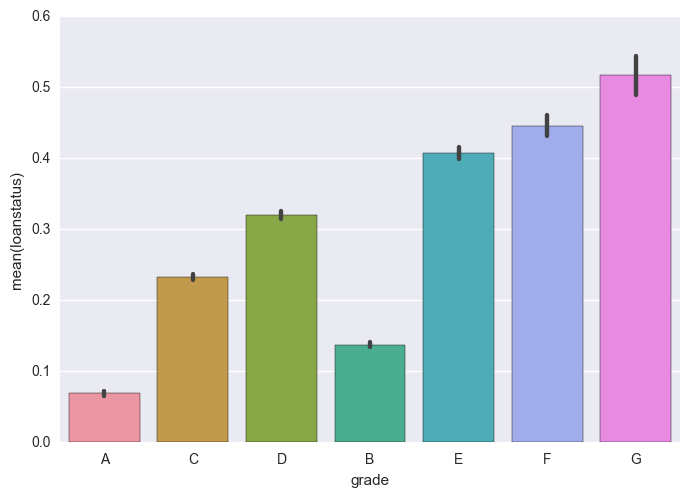

In [281]:
sns.barplot(x='grade',y = 'loanstatus',data = dat_subset)

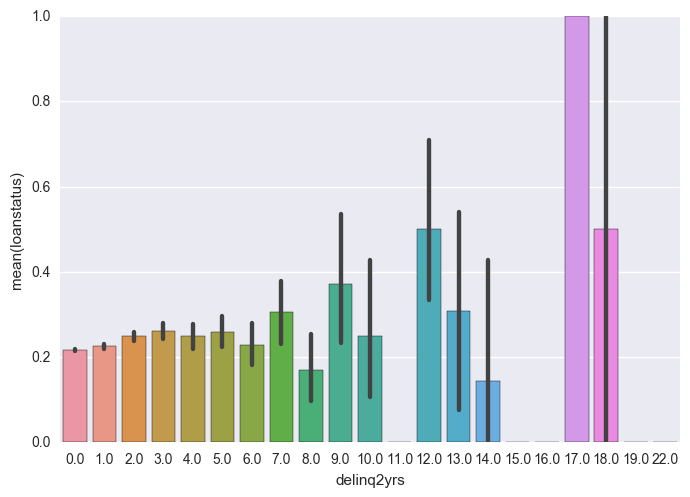

In [278]:

sns.barplot(x=cat_col[2],y = 'loanstatus',data = dat_subset)

In [173]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

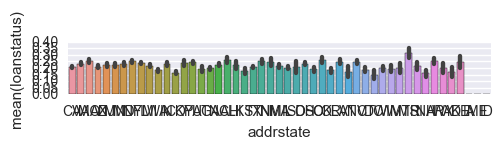

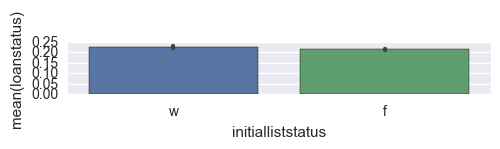

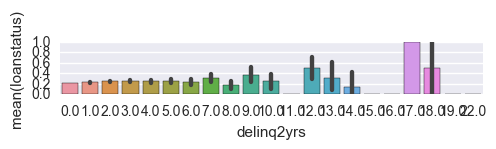

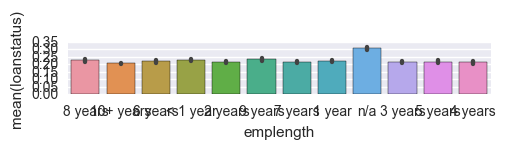

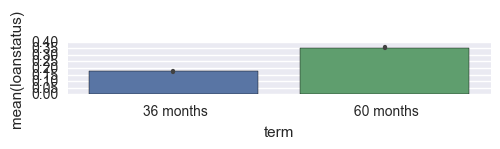

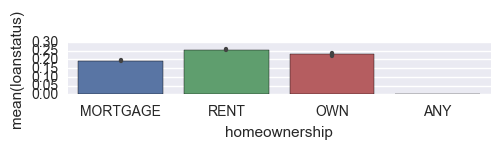

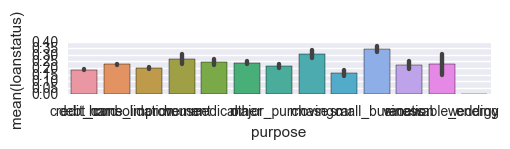

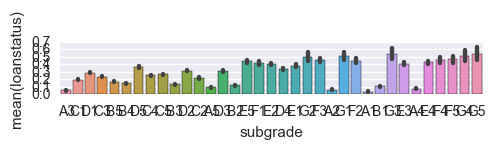

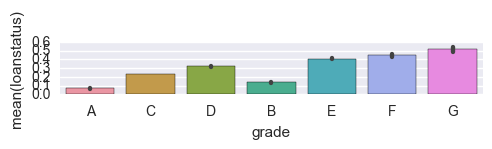

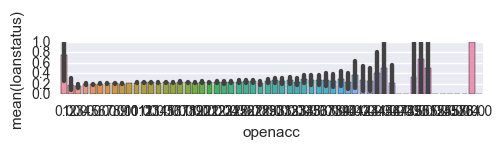

In [288]:
count=1
for i in range(len(cat_col)):
    fig = plt.figure(figsize=(12,8))
    plt.subplot(len(cat_col),2,count)
    sns.barplot(x=cat_col[i],y = 'loanstatus',data = dat_subset)
    count+=2

In [305]:
# Label Encoding
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
for cat_var in cat_col:
    print ("Label Encoding %s" % (cat_var))
    LE_var=cat_var+'_le'
    dat_subset[LE_var]=LBL.fit_transform(dat_subset[cat_var])
    LE_vars.append(LE_var)
    LE_map[cat_var]=LBL.classes_
    
print ("Label-encoded feaures: %s" % (LE_vars))


Label Encoding addrstate
Label Encoding initialliststatus
Label Encoding delinq2yrs
Label Encoding emplength
Label Encoding term
Label Encoding homeownership
Label Encoding purpose
Label Encoding subgrade
Label Encoding grade
Label Encoding openacc
Label-encoded feaures: ['addrstate_le', 'initialliststatus_le', 'delinq2yrs_le', 'emplength_le', 'term_le', 'homeownership_le', 'purpose_le', 'subgrade_le', 'grade_le', 'openacc_le']


In [308]:
# One Hot Encoding
OHE = preprocessing.OneHotEncoder(sparse=True)
OHE.fit(dat_subset[LE_vars])
OHE_sparse=OHE.transform(dat_subset[LE_vars])
                                   
OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in cat_col for level in LE_map[var] ]

print ("OHE_sparse size :" ,OHE_sparse.shape)
print ("One-hot encoded catgorical feature samples : %s" % (OHE_vars[:100]))

OHE_sparse size : (146796, 203)
One-hot encoded catgorical feature samples : ['addrst_AK', 'addrst_AL', 'addrst_AR', 'addrst_AZ', 'addrst_CA', 'addrst_CO', 'addrst_CT', 'addrst_DC', 'addrst_DE', 'addrst_FL', 'addrst_GA', 'addrst_HI', 'addrst_IA', 'addrst_ID', 'addrst_IL', 'addrst_IN', 'addrst_KS', 'addrst_KY', 'addrst_LA', 'addrst_MA', 'addrst_MD', 'addrst_ME', 'addrst_MI', 'addrst_MN', 'addrst_MO', 'addrst_MS', 'addrst_MT', 'addrst_NC', 'addrst_NH', 'addrst_NJ', 'addrst_NM', 'addrst_NV', 'addrst_NY', 'addrst_OH', 'addrst_OK', 'addrst_OR', 'addrst_PA', 'addrst_RI', 'addrst_SC', 'addrst_SD', 'addrst_TN', 'addrst_TX', 'addrst_UT', 'addrst_VA', 'addrst_VT', 'addrst_WA', 'addrst_WI', 'addrst_WV', 'addrst_WY', 'initialliststa_f', 'initialliststa_w', 'delinq2_0.0', 'delinq2_1.0', 'delinq2_2.0', 'delinq2_3.0', 'delinq2_4.0', 'delinq2_5.0', 'delinq2_6.0', 'delinq2_7.0', 'delinq2_8.0', 'delinq2_9.0', 'delinq2_10.0', 'delinq2_11.0', 'delinq2_12.0', 'delinq2_13.0', 'delinq2_14.0', 'delinq2_15.0',

In [376]:
dat = pd.get_dummies(dat_subset,columns=cat_col)

In [377]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
Y = dat['loanstatus']
X = dat.drop(['loanstatus'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [331]:
from sklearn import metrics, grid_search
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv, refit=False):
##Grid Search for the best model
    model = grid_search.GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring    = 'f1_weighted',
                                     verbose    = 10,
                                     n_jobs  = n_jobs,
                                     iid    = True,
                                     refit    = refit,
                                     cv      = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)
    print("Best score: %0.3f" % model.best_score_)
    print("Best parameters set:", model.best_params_)
    print("Scores:", model.grid_scores_)    
    return model

In [389]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy']}

RF = search_model(x_train
            , y_train
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] criterion=gini, n_estimators=100 ................................
[CV] criterion=gini, n_estimators=100 ................................
[CV] criterion=gini, n_estimators=100 ................................
[CV] criterion=gini, n_estimators=100 ................................
[CV] ....... criterion=gini, n_estimators=100, score=0.713652 - 2.8min
[CV] ....... criterion=gini, n_estimators=100, score=0.711948 - 2.8min
[CV] criterion=gini, n_estimators=100 ................................
[CV] ....... criterion=gini, n_estimators=100, score=0.711979 - 2.7min
[CV] criterion=gini, n_estimators=300 ................................
[CV] criterion=gini, n_estimators=300 ................................
[CV] ....... criterion=gini, n_estimators=100, score=0.712677 - 2.7min
[CV] criterion=gini, n_estimators=300 ................................
[CV] ....... criterion=gini, n_estimators=100, score=0.711830 - 2.5min


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.4min


[CV] criterion=gini, n_estimators=300 ................................
[CV] ....... criterion=gini, n_estimators=300, score=0.712015 - 8.6min
[CV] ....... criterion=gini, n_estimators=300, score=0.714233 - 8.6min
[CV] criterion=gini, n_estimators=300 ................................
[CV] ....... criterion=gini, n_estimators=300, score=0.712354 - 8.7min
[CV] criterion=gini, n_estimators=500 ................................
[CV] criterion=gini, n_estimators=500 ................................
[CV] ....... criterion=gini, n_estimators=300, score=0.712538 - 9.6min
[CV] criterion=gini, n_estimators=500 ................................
[CV] ....... criterion=gini, n_estimators=300, score=0.708379 - 9.3min


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 20.8min


[CV] criterion=gini, n_estimators=500 ................................
[CV] ....... criterion=gini, n_estimators=500, score=0.712188 -16.3min
[CV] criterion=gini, n_estimators=500 ................................
[CV] ....... criterion=gini, n_estimators=500, score=0.711032 -16.4min
[CV] criterion=entropy, n_estimators=100 .............................
[CV] ....... criterion=gini, n_estimators=500, score=0.712701 -16.7min
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .... criterion=entropy, n_estimators=100, score=0.714693 - 3.8min
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .... criterion=entropy, n_estimators=100, score=0.712967 - 2.9min
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .... criterion=entropy, n_estimators=100, score=0.716710 - 2.8min
[CV] criterion=entropy, n_estimators=100 .............................
[CV] ....... criterion=gini, n_estimators=500, score=0.713382 -16.1min


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 37.0min


[CV] criterion=entropy, n_estimators=300 .............................
[CV] .... criterion=entropy, n_estimators=100, score=0.716527 - 3.0min
[CV] criterion=entropy, n_estimators=300 .............................
[CV] .... criterion=entropy, n_estimators=100, score=0.709919 - 3.0min
[CV] criterion=entropy, n_estimators=300 .............................
[CV] ....... criterion=gini, n_estimators=500, score=0.709404 -14.6min
[CV] criterion=entropy, n_estimators=300 .............................
[CV] .... criterion=entropy, n_estimators=300, score=0.714132 - 9.4min
[CV] criterion=entropy, n_estimators=300 .............................
[CV] .... criterion=entropy, n_estimators=300, score=0.713698 - 9.5min
[CV] criterion=entropy, n_estimators=500 .............................
[CV] .... criterion=entropy, n_estimators=300, score=0.713000 - 9.5min
[CV] criterion=entropy, n_estimators=500 .............................
[CV] .... criterion=entropy, n_estimators=300, score=0.713270 - 9.0min
[CV] c

[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 61.5min remaining:  6.8min


[CV] .... criterion=entropy, n_estimators=500, score=0.714503 -12.8min
[CV] .... criterion=entropy, n_estimators=500, score=0.712522 -11.0min
[CV] .... criterion=entropy, n_estimators=500, score=0.709713 - 7.9min


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 69.1min finished


Best score: 0.714
Best parameters set: {'criterion': 'entropy', 'n_estimators': 100}
Scores: [mean: 0.71242, std: 0.00069, params: {'criterion': 'gini', 'n_estimators': 100}, mean: 0.71190, std: 0.00192, params: {'criterion': 'gini', 'n_estimators': 300}, mean: 0.71174, std: 0.00140, params: {'criterion': 'gini', 'n_estimators': 500}, mean: 0.71416, std: 0.00252, params: {'criterion': 'entropy', 'n_estimators': 100}, mean: 0.71265, std: 0.00179, params: {'criterion': 'entropy', 'n_estimators': 300}, mean: 0.71238, std: 0.00159, params: {'criterion': 'entropy', 'n_estimators': 500}]
